In [303]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
import cufflinks as cf
%matplotlib inline
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats




In [70]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [71]:
init_notebook_mode(connected=True)
cf.go_offline()

In [40]:
# File to import
soccer_data_to_load = "resources/transfermarkt_fbref_201718.csv"

In [41]:
# Read file and store into pandas dataframes
soccer_data = pd.read_csv(soccer_data_to_load, sep=";")


In [47]:
# Display data
soccer_data.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [379]:
clean_data_df = clean_data.drop(columns='Unnamed: 0')
clean_data_df


,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Victor Osimhen,ng NGA,"FW,MF",Wolfsburg,18,1998,1000000,186,attack - Centre-Forward,right,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#
2228,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25,1991,3500000,170,attack - Right Winger,left,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#
2229,Paul Jaeckel,de GER,DF,Wolfsburg,19,1998,5000,189,Defender - Centre-Back,right,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#
2230,Paul Verhaegh,nl NED,DF,Wolfsburg,33,1983,1000000,178,Defender - Right-Back,right,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#


In [380]:
# Index 2223 was removed since most of the values for the player were 0.
clean_data = soccer_data.drop(index=2223)

In [381]:
# Create a separate data set for the seaborn pairplot that only includes 'age', 'value', Pts/G','xG','Attendance','position'. The code meant to demonstrate relashionship between different values
set_data = clean_data_df[['age','value','Pts/G','xG','Attendance','position']]
set_data

,age,value,Pts/G,xG,Attendance,position
0,23,1800000,1.24,39.0,"16,819","FW,MF"
1,24,70000000,2.00,83.3,66161,DF
2,21,2000000,1.24,39.0,"16,819",DF
3,23,60000000,2.45,78.3,66603,DF
4,31,1800000,1.24,39.0,"16,819",MF
...,...,...,...,...,...,...
2227,18,1000000,0.97,39.2,25712,"FW,MF"
2228,25,3500000,0.97,39.2,25712,"FW,MF"
2229,19,5000,0.97,39.2,25712,DF
2230,33,1000000,0.97,39.2,25712,DF


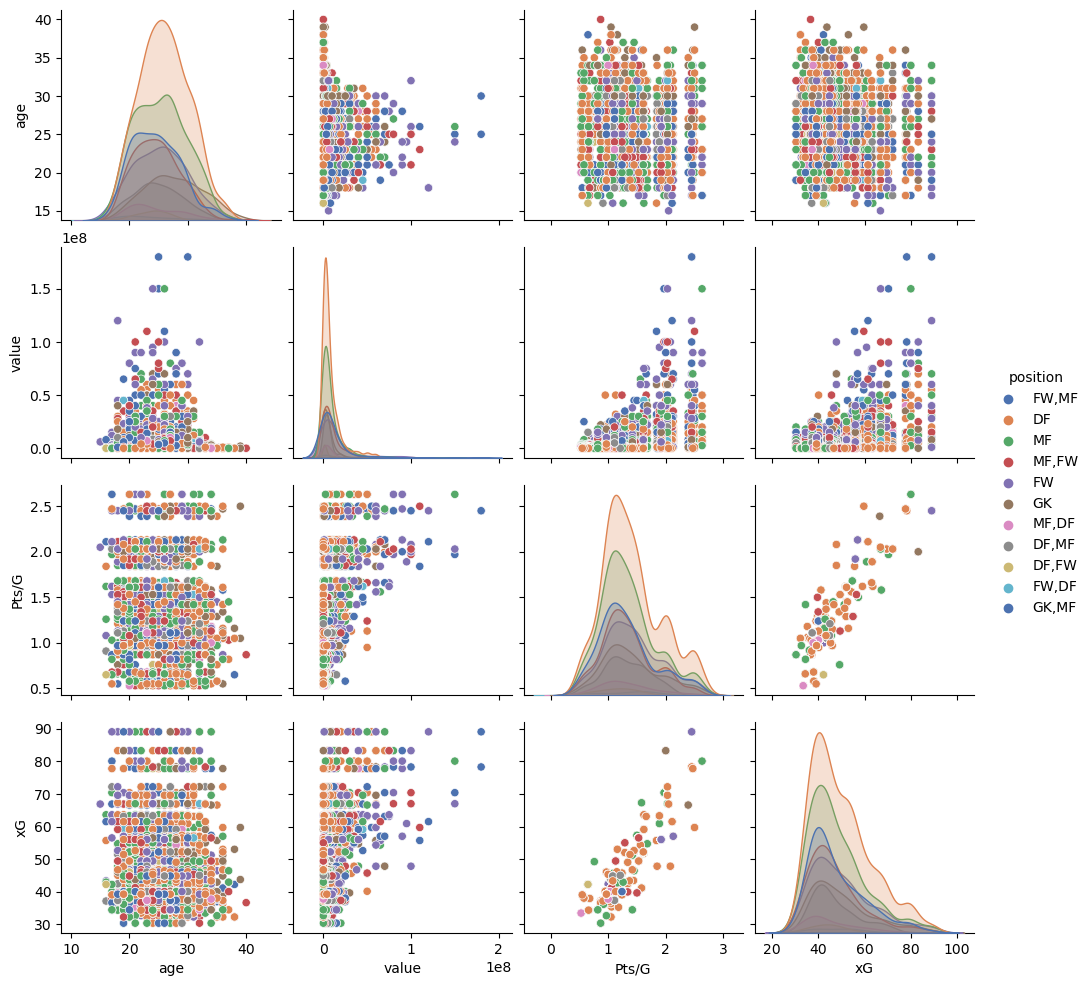

In [306]:
# Create the pairplot using seaborn
sns.pairplot(set_data,palette='deep',hue='position')


In [251]:
# Count the total number of players (The number of player does not match the number of rows because some players changed their club several times)
total_players = len(clean_data_df['player'].unique())
print(f'number of players in the analysis is: {total_players}')

number of players in the analysis is: 2117


In [446]:
# Count number of duplicate players (There are no name duplicates when checked against name and squad)
duplicate_total_players = soccer_data[soccer_data.duplicated(["player",'squad'],keep=False)]
duplicate_total_players.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season


In [252]:
# Determine which nationality has the most players included in the analysis
nationality_count = clean_data_df.groupby(['nationality']).count()['player']
nationality_count = nationality_count.sort_values(ascending=False)
nationality_count




nationality
es ESP     325
fr FRA     281
it ITA     265
de GER     199
eng ENG    176
          ... 
la LAO       1
mr MTN       1
li LIE       1
mg MAD       1
gf GUF       1
Name: player, Length: 98, dtype: int64

In [441]:
# Determine which nationality has the most players included in the analysis
top_10 = nationality_count[:5]
top_10_df = pd.DataFrame(top_10)
top_10_df



,player
nationality,
es ESP,325
fr FRA,281
it ITA,265
de GER,199
eng ENG,176


In [442]:
# Bar chart of top 20 countries with highest number of players
px.bar(top_10_df,width=600,height=400,title='Players by Nationality')

In [443]:
# Identify top players in the Leagues using the following parameters 'value','goals','Pts/G','xGDiff/90','xG','xGA','Attendance','cards_red'
top_players_df = clean_data_df.sort_values(by=['goals','Pts/G','xGDiff/90','xG','xGA','Attendance','value'],ascending=False)
top_players_df[:10]

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
198,Lionel Messi,ar ARG,"FW,MF",Barcelona,30,1987,180000000,170,attack - Right Winger,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
1199,Mohamed Salah,eg EGY,"FW,MF",Liverpool,25,1992,150000000,175,attack - Right Winger,left,...,1.97,70.4,33.3,37.1,0.98,53049,1,0,0,201718#
1982,Harry Kane,eng ENG,FW,Tottenham,24,1993,150000000,188,attack - Centre-Forward,right,...,2.03,67.0,33.2,33.8,0.89,67953,1,0,0,201718#
219,Robert Lewandowski,pl POL,FW,Bayern Munich,28,1988,90000000,185,attack - Centre-Forward,right,...,2.47,77.8,33.7,44.1,1.30,75000,1,0,0,201718#
927,Mauro Icardi,ar ARG,FW,Inter,24,1993,95000000,181,attack - Centre-Forward,right,...,1.89,60.9,35.3,25.6,0.67,57529,1,0,0,201718#
1051,Ciro Immobile,it ITA,FW,Lazio,27,1990,50000000,185,attack - Centre-Forward,right,...,1.89,63.3,44.3,18.9,0.50,30990,0,0,0,201718#
1566,Edinson Cavani,uy URU,FW,Paris S-G,30,1987,60000000,184,attack - Centre-Forward,right,...,2.45,89.1,32.3,56.9,1.50,46929,1,0,0,201718#
1626,Cristiano Ronaldo,pt POR,FW,Real Madrid,32,1985,100000000,187,attack - Left Winger,both,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,1,201718#
205,Luis Suárez,uy URU,FW,Barcelona,30,1987,70000000,182,attack - Centre-Forward,right,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
949,Paulo Dybala,ar ARG,"MF,FW",Juventus,23,1993,110000000,177,attack - Second Striker,left,...,2.50,59.7,28.8,30.9,0.81,39316,1,0,0,201718#


C:\Users\agorbulin\AppData\Local\Temp\ipykernel_30524\2324823175.py:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



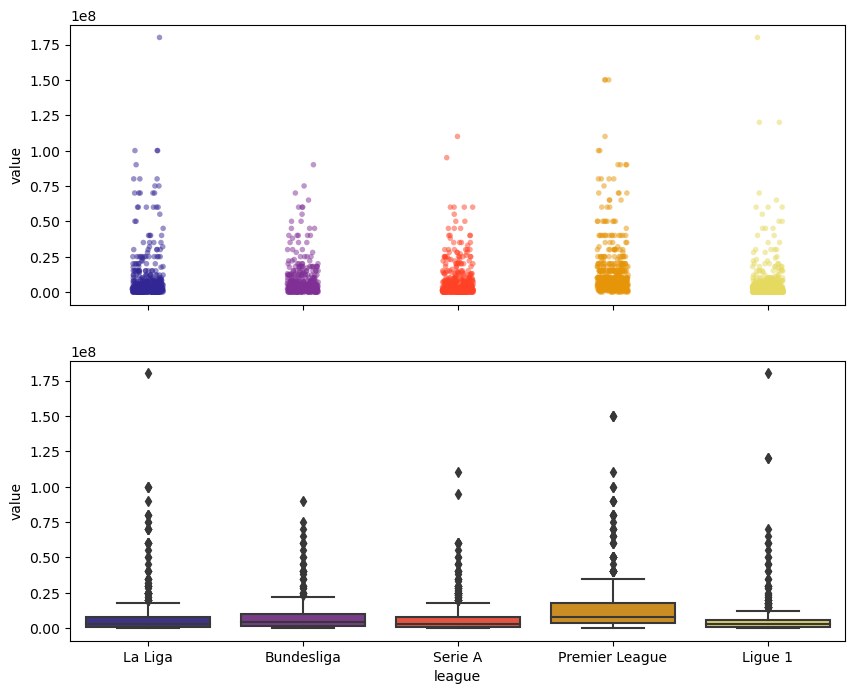

In [375]:
# Creating scatter and box subplot of value vs league

fig3, ax = plt.subplots(2,1, sharex=True, figsize=(10,8))

g = sns.stripplot(data=clean_data_df, x='league', y='value', palette='CMRmap',size=4, alpha=0.5,ax=ax[0])

g = sns.boxplot(data=clean_data_df, x='league', y='value', palette='CMRmap',ax=ax[1])



In [413]:
# Calculating number of players per league
player_by_league = clean_data_df.groupby(['league']).count()['player']
player_by_league = player_by_league.sort_values(ascending=False)
player_by_league

league
La Liga           478
Premier League    476
Serie A           471
Ligue 1           431
Bundesliga        375
Name: player, dtype: int64

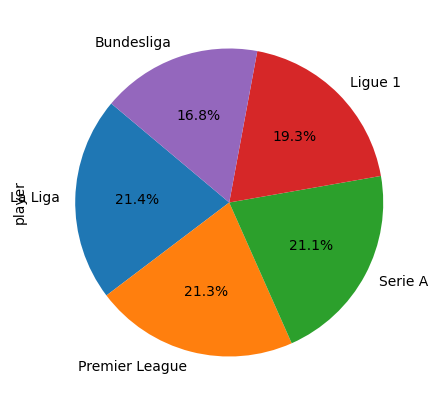

In [414]:
# Create a pie chart for number of players per league (Analysis note: Bundesliga has a less number of players since it has 18 clubs vs other leagues has 20 teams)
player_by_league=player_by_league.plot(kind='pie', figsize=(5,5),autopct='%1.1f%%', startangle=140)


### (Analysis note: Bundesliga has a less number of players since it has 18 clubs vs other leagues has 20 teams)

In [431]:
# Calculate the number of right/left foot players
foot_type = clean_data_df.groupby(['foot']).count()['player']
foot_type_df = pd.DataFrame(foot_type)
foot_type_df = foot_type_df.sort_values(by= ['foot'],ascending=False)
foot_type_df


,player
foot,
right,1600
left,566
both,60


In [432]:
# Create bar chart to illustrate by foot preferences
fig2 = px.bar(foot_type_df, title='Foot Type',width=600,height=500)
fig2

In [260]:
# Determine which position plays the most minutes
position_minutes = clean_data_df.groupby(["position"])["minutes"].sum()
position_minutes = position_minutes.sort_values(ascending=False)
position_minutes_df = pd.DataFrame(position_minutes) 
position_minutes_df[:10]

,minutes
position,
DF,984331
MF,591090
FW,326750
"FW,MF",322182
"MF,FW",301127
GK,265953
"DF,MF",162296
"MF,DF",63246
"DF,FW",18118


In [265]:
# Plot bar chart which position plays the most minutes
fig = px.bar(position_minutes_df[:10],width=600,height=400)
fig


In [445]:
#Print plot to Html,pdf or powerpoint
pio.write_html(fig, file='bar_chart.html')

In [416]:
# Determine which league has the highest value of players
league_value = clean_data_df.groupby(["league"])["value"].sum()
league_value = league_value.sort_values(ascending=False)
league_value_df = pd.DataFrame(league_value)
league_value_df

,value
league,
Premier League,7251405000
La Liga,4443875000
Serie A,3489490000
Bundesliga,3254652500
Ligue 1,2975815000


In [434]:
# Bar chart to show the value of each league
px.bar(league_value_df,width=600,height=500)

In [267]:
# Determine which age has the highest value
age_value = clean_data.groupby(["age"])["value"].sum()
age_value=age_value.sort_values(ascending=False)
age_value_df = pd.DataFrame(age_value)

age_value_df

,value
age,
26,2497790000
25,2435640000
23,2254495000
24,2227905000
28,1739285000
21,1555360000
22,1521615000
27,1429055000
30,1335930000


In [197]:
# Create scatter plot to show the value of players by age
px.scatter(age_value_df, width=700, height=500)

In [295]:
#Scatter plot of age vs value
px.scatter(clean_data_df,x="age", y="value",width=600, height=400,hover_data=['player'])

In [440]:
# Determine which position has the most red cards

red_cards = clean_data_df.groupby(['position'])['cards_red'].sum().reset_index()
yellow_cards = clean_data_df.groupby(['position'])['cards_yellow'].sum().reset_index()

card_stats_df = 




,position,cards_yellow
0,DF,2126
1,"DF,FW",23
2,"DF,MF",321
3,FW,579
4,"FW,DF",16
5,"FW,MF",535
6,GK,131
7,"GK,MF",0
8,MF,1562
9,"MF,DF",153


In [23]:
# Determine which league has the most valuable players


In [24]:
# Determine the average player age
average_age = soccer_data['age'].mean()
average_age

25.416666666666668

In [25]:
#Checking for the null values in the data fame
print(soccer_data.isnull().sum())

Unnamed: 0      0
player          0
nationality     0
position        0
squad           0
               ..
Attendance      0
CL              0
WinCL           0
CLBestScorer    0
Season          0
Length: 400, dtype: int64


In [26]:
# Determine which position has the tallest players

In [27]:
# How does the league in which the player plays affect their value, goals scored, and minutes played?

In [30]:
value_pts_g_correlation = soccer_data['value'].corr(soccer_data['Pts/G'])
value_pts_g_correlation

0.4901480622994063

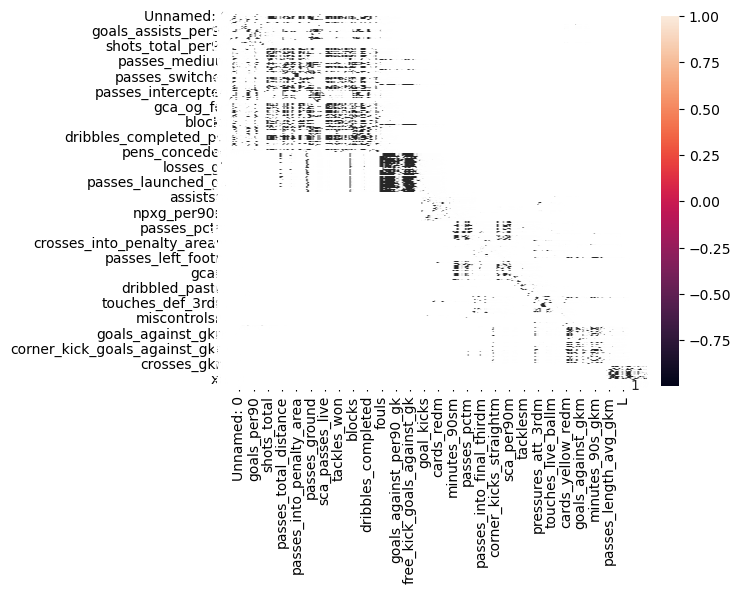

In [198]:
#check the correlation between columns
corr = clean_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

In [35]:
corr

,Unnamed: 0,age,birth_year,value,height,games,games_starts,minutes,goals,assists,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
Unnamed: 0,1.000000,-0.053567,-0.031895,0.007957,-0.001885,-0.006029,-0.007624,-0.008489,0.009849,-0.003108,...,0.054287,0.046960,0.048932,0.063053,-0.047999,0.062033,0.061928,0.064392,0.003602,0.021728
age,-0.053567,1.000000,0.019638,-0.081422,0.041618,0.151376,0.180626,0.176074,0.032553,0.007389,...,-0.016377,-0.002770,-0.013777,-0.044240,-0.015713,-0.019456,-0.018640,-0.032577,-0.014367,0.031588
birth_year,-0.031895,0.019638,1.000000,0.020765,-0.013803,0.018446,0.009654,0.011100,0.007717,0.012278,...,0.038986,0.035497,0.037519,0.021186,-0.053092,0.038856,0.038276,0.013450,0.003610,-0.002670
value,0.007957,-0.081422,0.020765,1.000000,-0.044236,0.330607,0.337360,0.336962,0.559775,0.528091,...,0.507780,0.490438,0.490148,0.486849,-0.392598,0.489681,0.489638,0.459963,0.175426,0.114715
height,-0.001885,0.041618,-0.013803,-0.044236,1.000000,-0.011085,0.053670,0.059743,-0.082296,-0.217525,...,-0.004596,-0.023009,-0.014162,-0.007164,-0.024789,0.007739,0.007955,-0.001334,0.009496,0.015891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xGDiff,0.062033,-0.019456,0.038856,0.489681,0.007739,0.076266,0.061647,0.063751,0.195219,0.241102,...,0.930683,0.893059,0.901905,0.928639,-0.884282,1.000000,0.999302,0.676227,0.178162,0.039668
xGDiff/90,0.061928,-0.018640,0.038276,0.489638,0.007955,0.076204,0.061584,0.063671,0.195469,0.242103,...,0.929720,0.892162,0.902467,0.929084,-0.882283,0.999302,1.000000,0.678119,0.176034,0.039194
CL,0.064392,-0.032577,0.013450,0.459963,-0.001334,0.031166,0.022469,0.022933,0.150015,0.185439,...,0.747646,0.729178,0.744747,0.666535,-0.549737,0.676227,0.678119,1.000000,0.201050,0.044764
WinCL,0.003602,-0.014367,0.003610,0.175426,0.009496,0.017446,0.014343,0.014776,0.067283,0.067280,...,0.167244,0.130885,0.125059,0.262458,-0.035826,0.178162,0.176034,0.201050,1.000000,0.222653


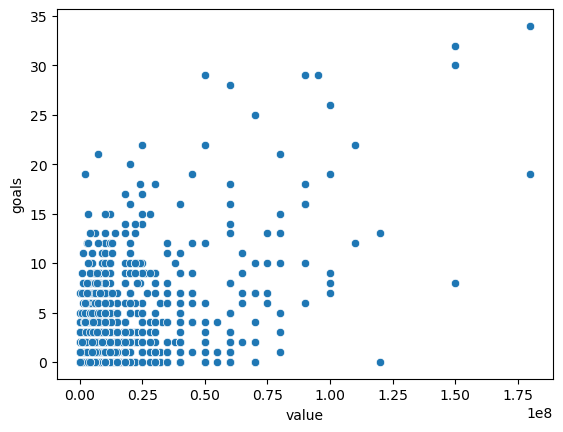

In [199]:
## plot a scatter plot between two columns (need to add linear regression)
sns.scatterplot(x='value', y='goals', data=clean_data)
plt.show()

In [ ]:
# How does the number of tackles and tackles won relate to the player's position?
grouped = soccer_data.groupby('position')['tackles', 'tackles_won'].mean()
grouped

C:\Users\agorbulin\AppData\Local\Temp\ipykernel_29192\3575465631.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = soccer_data.groupby('position')['tackles', 'tackles_won'].mean()


,tackles,tackles_won
position,,
0,0.000000,0.000000
DF,29.249211,17.184543
"DF,FW",18.476190,10.190476
"DF,MF",30.376068,17.923077
FW,9.705426,6.410853
"FW,DF",10.800000,6.600000
"FW,MF",14.375439,9.319298
GK,0.017647,0.011765
"GK,MF",0.000000,0.000000


In [ ]:
grouped['tackles_won_per_tackle'] = grouped['tackles_won'] / grouped['tackles'] *100
grouped

,tackles,tackles_won,tackles_won_per_tackle
position,,,
0,0.000000,0.000000,NaN
DF,29.249211,17.184543,58.752157
"DF,FW",18.476190,10.190476,55.154639
"DF,MF",30.376068,17.923077,59.003939
FW,9.705426,6.410853,66.054313
"FW,DF",10.800000,6.600000,61.111111
"FW,MF",14.375439,9.319298,64.827923
GK,0.017647,0.011765,66.666667
"GK,MF",0.000000,0.000000,NaN


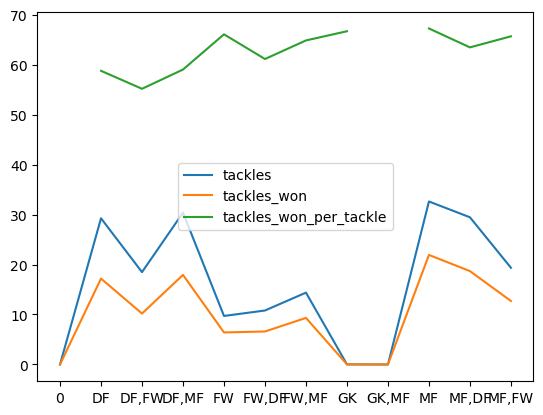

In [ ]:
plt.plot(grouped)
plt.legend(grouped)

In [ ]:
# What is the correlation between xG and actual goals scored for the players in the squad?
correlation = soccer_data['xG'].corr(soccer_data['goals'])
correlation

0.19870921565569247

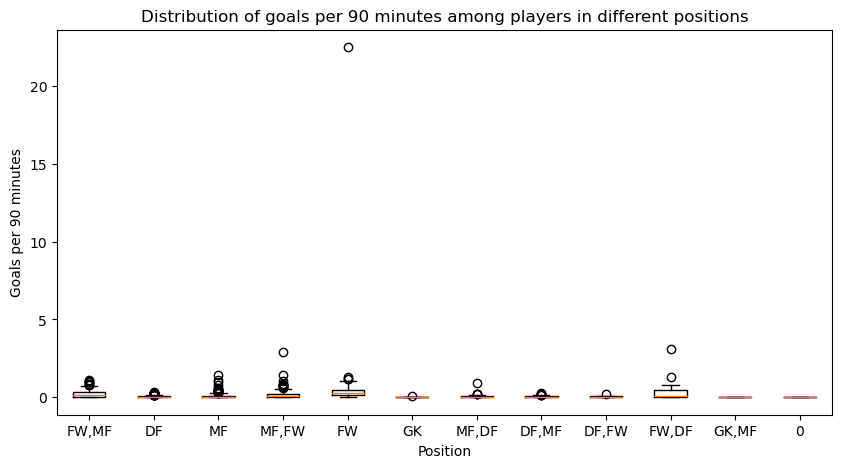

In [ ]:
# What is the distribution of goals per 90 minutes among players in different positions?

plt.figure(figsize=(10, 5))
plt.boxplot([soccer_data.loc[soccer_data['position'] == pos, 'goals_per90'] for pos in soccer_data['position'].unique()], labels=soccer_data['position'].unique())
plt.xlabel('Position')
plt.ylabel('Goals per 90 minutes')
plt.title('Distribution of goals per 90 minutes among players in different positions')
plt.show()